## Imports

In [244]:
# image processing
import cv2
import imutils

# others
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Read Image

In [245]:
# Reading the Image 
image = cv2.imread('google_street_view.jpg') 

# Get the height of image
height = int(image.shape[0])
width = int(image.shape[1])
print('Height of the image : ', height)
print('Width of the image : ', width)

# # Resizing the Image 
# height = int(image.shape[0]/4)
# width = int(image.shape[1]/4)
# image = cv2.resize(image,(width,height))
# plt.imshow(image)

Height of the image :  1440
Width of the image :  2560


## Set up

In [246]:
# camera information
camera_height_in_pixel = 780 # In pixel
camera_height_in_real  = 2.49936 #  In meter

# focal information
focal_image  = height / 2
focal_angle  = 94
focal_length = focal_image/(np.tan(np.pi*focal_angle/360))
cita         = np.arctan((camera_height_in_pixel-focal_image)/focal_length)
print('Pitch Angle (in radian): ', cita)

Pitch Angle (in radian):  0.08912730735693015


Human Detected :  8


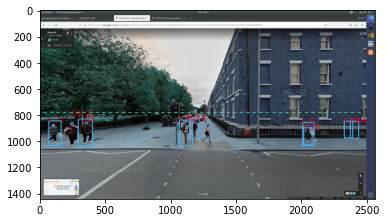

In [247]:
# Drawing the imaginary line about camera height
for i in range(50):
    cv2.line(image,
    ((i*50-25),camera_height_in_pixel),
    ((i*50),camera_height_in_pixel),
    (66,240,186),4)

# Initializing the HOG person 
hog = cv2.HOGDescriptor() 
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector()) 
   
# Detecting all humans 
(humans, _) = hog.detectMultiScale(
    image,  winStride=(3, 3), 
    padding=(3, 3), scale=1.21)

# getting no. of human detected
print('Human Detected : ', len(humans))
   
# The result about human detection
for (x, y, w, h) in humans: 
    ## Drawing the rectangle regions ##
    cv2.rectangle(
        img       = image,
        pt1       = (x, y),  
        pt2       = (x + w, y + h),  
        color     = (65, 183, 255), 
        thickness = 5)
    ###################################

    # Calculate the height in real world
    height_human = round(camera_height_in_real * ((h-15)/(h+y-camera_height_in_pixel)),2)

    ########## Text about height ###########
    cv2.putText(
        img       = image,
        text      = str(height_human),
        org       = (x-15,y+15),
        fontFace  = cv2.FONT_HERSHEY_SIMPLEX,
        fontScale = 2,
        color     = (216,0,31),
        thickness = 3)
    #########################################

  
# Displaying the output Image 
plt.imshow(image) 